<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0315/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 15s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [ ]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

dog


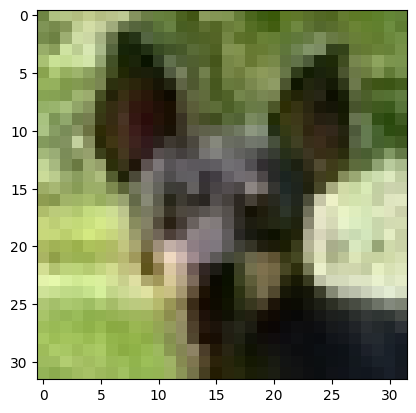

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 灰階圖片(0: 黑色 255: 白色)
idx = 2500
print(trans[y_train[idx]])
plt.imshow(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

layers = [
    # 1個filter(3 * 3 * 3) * 64(種) + 64(bias) -> 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種) + 128(bias) -> 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    # 256 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 256)       

In [ ]:
# x: 0~1
# y: 配合loss這邊做Sparse
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       metrics=["accuracy"],
       optimizer="adam")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=c)

Epoch 1/40
450/450 [==============================] - 8s 13ms/step - loss: 1.6138 - accuracy: 0.4015 - val_loss: 1.2702 - val_accuracy: 0.5396
Epoch 2/40
450/450 [==============================] - 5s 11ms/step - loss: 1.1344 - accuracy: 0.5950 - val_loss: 0.9962 - val_accuracy: 0.6502
Epoch 3/40
450/450 [==============================] - 5s 11ms/step - loss: 0.9197 - accuracy: 0.6754 - val_loss: 0.8840 - val_accuracy: 0.6882
Epoch 4/40
450/450 [==============================] - 5s 12ms/step - loss: 0.7786 - accuracy: 0.7255 - val_loss: 0.7392 - val_accuracy: 0.7432
Epoch 5/40
450/450 [==============================] - 5s 11ms/step - loss: 0.6642 - accuracy: 0.7701 - val_loss: 0.7301 - val_accuracy: 0.7486
Epoch 6/40
450/450 [==============================] - 5s 11ms/step - loss: 0.5734 - accuracy: 0.8007 - val_loss: 0.6806 - val_accuracy: 0.7628
Epoch 7/40
450/450 [==============================] - 5s 12ms/step - loss: 0.4950 - accuracy: 0.8282 - val_loss: 0.6525 - val_accuracy: 0.7750

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6984 - accuracy: 0.7634


[0.6984240412712097, 0.7634000182151794]

In [ ]:
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(true)".format(trans[i]) for i in range(10)],
       columns=["{}(pred)".format(trans[i]) for i in range(10)])

313/313 [==============================] - 1s 3ms/step


,airplane(pred),automobile(pred),bird(pred),cat(pred),deer(pred),dog(pred),frog(pred),horse(pred),ship(pred),truck(pred)
airplane(true),783,12,72,18,7,7,5,12,62,22
automobile(true),16,875,5,18,3,10,7,3,25,38
bird(true),40,2,694,77,54,51,39,29,8,6
cat(true),19,2,59,629,39,161,37,36,5,13
deer(true),15,2,75,84,679,37,25,75,8,0
dog(true),14,0,29,142,31,718,8,52,3,3
frog(true),5,2,61,98,28,25,764,7,9,1
horse(true),9,1,36,43,32,45,3,823,4,4
ship(true),43,18,21,16,2,10,1,1,882,6
truck(true),31,89,13,24,1,9,7,17,22,787


In [ ]:
import numpy as np
idx = np.nonzero(y_test != pre)[0]
idx = idx[:100]
plt.figure(figsize=(15, 30))
# 預測錯誤的預測值
fp_pred = pre[idx]
# 預測錯誤的真實值
fp_true = y_test[idx]
# 預測錯誤的圖片
fp_img = x_test[idx]
for i in range(len(idx)):
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    t = "[T]:{}\n[P]:{}".format(trans[fp_true[i]], trans[fp_pred[i]])
    plt.title(t)
    plt.imshow(fp_img[i])

1/1 [==============================] - 0s 18ms/step
airplane 的機率是: 0.0126
automobile 的機率是: 0.2049
bird 的機率是: 0.0107
cat 的機率是: 0.4281
deer 的機率是: 0.0006
dog 的機率是: 0.0279
frog 的機率是: 0.0024
horse 的機率是: 0.1057
ship 的機率是: 0.0424
truck 的機率是: 0.1648
最高機率是: cat


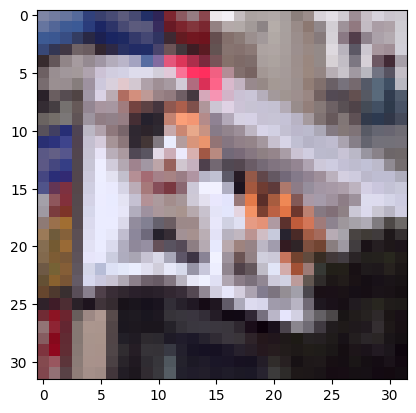

In [ ]:
import requests
from PIL import Image
url = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/aglzo4nc-1625740186.jpeg?crop=0.665xw:1.00xh;0.133xw,0&resize=640:*" #@param {type:"string"}
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
}
response = requests.get(url, stream=True, headers=h)

img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_np = np.array(img)
testx = img_np.reshape(1, 32, 32, 3) / 255.0
probas = model.predict(testx)[0]
for i in range(10):
    print(trans[i], "的機率是:", round(probas[i], 4))
ans = probas.argmax(axis=-1)
print("最高機率是:", trans[ans])
plt.imshow(img_np)
     

1/1 [==============================] - 0s 59ms/step


<ipython-input-50-267ac1b66c1d>:27: RuntimeWarning: invalid value encountered in true_divide
  fil = (fil - mi) / (ma - mi)


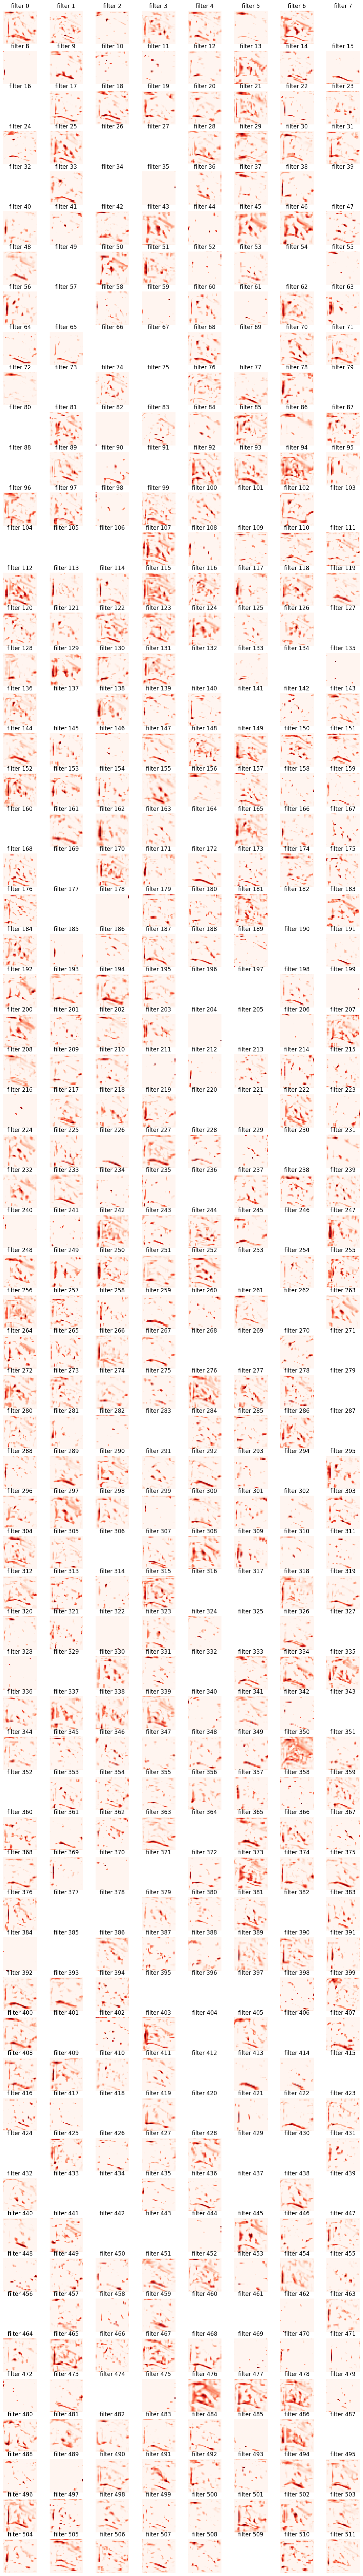

In [ ]:
# first layer
layers = [
    model.layers[0]
]
# 256那層
# layers = [
#     model.layers[0],
#     model.layers[2],
#     model.layers[4],
# ]
# 512那層
# layers = [
#     model.layers[0],
#     model.layers[2],
#     model.layers[4],
#     model.layers[6],
# ]
partial = Sequential(layers)
conv = partial.predict(img_np.reshape(1, 32, 32, 3))[0]
plt.figure(figsize=(14, 14))
# 取出64種組合方式的某一個
for i in range(64):
    idx = i
    fil = conv[:,:,i]
    # 0~1
    ma, mi = fil.max(), fil.min()
    fil = (fil - mi) / (ma - mi)
    title = "filter {}".format(i)
    plt.subplot(8, 8, i+1)
    plt.title(title)
    plt.axis("off")
    plt.imshow(fil, cmap="Reds")